# On The Free Energy Penalty of Cavity Formation In Salt Solutions: Rethinking the Terms “Kosmotropic” and “Chaotropic”.

Stefan Hervø-Hansen<sup>a,*</sup> and Nobuyuki Matubayasi<sup>a,*</sup>.<br><br>
<sup>a</sup> Division of Chemical Engineering, Graduate School of Engineering Science, Osaka University, Toyonaka, Osaka 560-8531, Japan.<br>
<sup>*</sup> To whom correspondence may be addressed: stefan@cheng.es.osaka-u.ac.jp and nobuyuki@cheng.es.osaka-u.ac.jp.

## Analysis & Model Construction


## Import of Python Modules & Auxiliary Functions

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os,time
import mdtraj as md
import parmed as pmd

from math import isclose

In [22]:
salts = {
    'NaF': {'cation': 'NA', 'anion': 'F'},
    'NaCl': {'cation': 'NA', 'anion': 'CL'},
    'NaI': {'cation': 'NA', 'anion': 'I'}
}

solutes = {
    'n-butane': {'resname': 'BUT'},
    # 'propane': {'resname': 'PRP'},
}

concentrations = {
#     0.0:{'N_solute':1,'N_water':10000,'N_cation':0,'N_anion':0},
    # 0.25:{'N_solute':1,'N_water':10000,'N_cation':45,'N_anion':45},
    0.5:{'N_solute':1,'N_water':10000,'N_cation':90,'N_anion':90},
#     0.75:{'N_solute':1,'N_water':10000,'N_cation':135,'N_anion':135},
    # 1.00:{'N_solute':1,'N_water':10000,'N_cation':180,'N_anion':180}
}

rdf_pairs = {
    # 'solute_water':{'index1': '2','index2': '9','resname1': L['resname'],'resname2': 'HOH'},
    # 'solute_cation':{'index1': '2','index2': '3','resname1': L['resname'],'resname2': S['cation']},  
    # 'solute_anion':{'index1': '2','index2': '4','resname1': L['resname'],'resname2': S['anion']},
    # 'water_cation':{'index1': '9','index2': '3','resname1': 'HOH','resname2': S['cation']}, 
    # 'water_anion':{'index1': '9','index2': '4','resname1': 'HOH','resname2': S['anion']},
    'water_water':{'index1': '9','index2': '9','resname1': 'HOH','resname2': 'HOH'},    
}

### Calc RDF

In [20]:
script = """#!/bin/bash
#PBS -l nodes=oz01:ppn=1

if [ "$PBS_O_WORKDIR" != "" ];then
  cd $PBS_O_WORKDIR
fi
NUMNODES=`wc -l < $PBS_NODEFILE`

source /data2/APPLI/packages/gromacs/gromacs-2021.4-intel-single.rc

cd /home/lin/Cavity-Formation/Simulations/solute_salt_water/{solute}/{salt}/{concentration}/rdf

gmx_mpi rdf -f /home/lin/Cavity-Formation/md/solute_salt_water/{solute}/{salt}/{concentration}/md/solution_run.xtc -s /home/lin/Cavity-Formation/md/solute_salt_water/{solute}/{salt}/{concentration}/md/solution_run.tpr -n /home/lin/Cavity-Formation/Simulations/solute_salt_water/{solute}/{salt}/{concentration}/rdf/index.ndx -cn cn_{resname1}_{resname2}.xvg -o rdf_{resname1}_{resname2}.xvg << EOF
{index1}
{index2}
EOF
"""

In [24]:
tag = 0
for solute,L in solutes.items():
    for salt,S in salts.items():
        for concentration,N in concentrations.items():
            output_dir = f'/home/lin/Cavity-Formation/Simulations/solute_salt_water/{solute}/{salt}/{concentration}/rdf/script'
            if not os.path.exists(output_dir):
                os.makedirs(output_dir)
            os.chdir(f'{output_dir}')
            for rdf_pair,R in rdf_pairs.items():
                print (script.format(solute=solute,salt=salt,concentration=concentration,resname1=R['resname1'],resname2=R['resname2'],index1=R['index1'],index2=R['index2']))
                with open(f'run{tag:02}.sh', 'w') as f:
                    f.write(script.format(solute=solute,salt=salt,concentration=concentration,resname1=R['resname1'],resname2=R['resname2'],index1=R['index1'],index2=R['index2']))
                f.close()
                os.system(f'qsub run{tag:02}.sh')
                tag = tag+1


#!/bin/bash
#PBS -l nodes=oz01:ppn=1

if [ "$PBS_O_WORKDIR" != "" ];then
  cd $PBS_O_WORKDIR
fi
NUMNODES=`wc -l < $PBS_NODEFILE`

source /data2/APPLI/packages/gromacs/gromacs-2021.4-intel-single.rc

cd /home/lin/Cavity-Formation/Simulations/solute_salt_water/n-butane/NaF/0.5/rdf

gmx_mpi rdf -f /home/lin/Cavity-Formation/md/solute_salt_water/n-butane/NaF/0.5/md/solution_run.xtc -s /home/lin/Cavity-Formation/md/solute_salt_water/n-butane/NaF/0.5/md/solution_run.tpr -n /home/lin/Cavity-Formation/Simulations/solute_salt_water/n-butane/NaF/0.5/rdf/index.ndx -cn cn_HOH_HOH.xvg -o rdf_HOH_HOH.xvg << EOF
9
9
EOF

#!/bin/bash
#PBS -l nodes=oz01:ppn=1

if [ "$PBS_O_WORKDIR" != "" ];then
  cd $PBS_O_WORKDIR
fi
NUMNODES=`wc -l < $PBS_NODEFILE`

source /data2/APPLI/packages/gromacs/gromacs-2021.4-intel-single.rc

cd /home/lin/Cavity-Formation/Simulations/solute_salt_water/n-butane/NaCl/0.5/rdf

gmx_mpi rdf -f /home/lin/Cavity-Formation/md/solute_salt_water/n-butane/NaCl/0.5/md/solution_run.xtc -s 

#### plot data

In [5]:
# treat lines start with '#' and '@' as comment in xvg files made by GROMACS
def extract_data():
    for line in xvg:
        if line[0] == '#' or line[0] == '@':
            continue
        else:
            cols = line.split()
            x.append(float(cols[0]))
            y.append(float(cols[1])) 
    
    

No handles with labels found to put in legend.


BUT
HOH
BUT
NA
BUT
F
HOH
NA
HOH
F
BUT
HOH
BUT
NA
BUT
CL
HOH
NA
HOH
CL
BUT
HOH
BUT
NA
BUT
I
HOH
NA
HOH
I


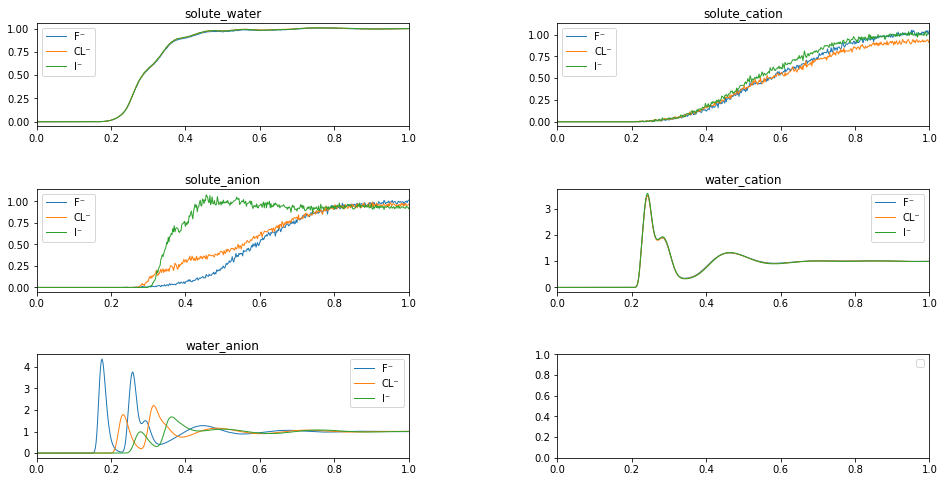

In [13]:
from matplotlib import cm
fig, axes = plt.subplots(3,2,figsize=(8*2,4*2))
fig.subplots_adjust(wspace=0.4, hspace=0.6)
# axes2 = axes[0].twinx()





# /home/lin/Cavity-Formation/md/solute_salt_water/n-butane/NaF/0.5/md
for solute,L in solutes.items():
    for salt,S in salts.items():
        for concentration,N in concentrations.items():
            rdf_pairs = {
    'solute_water':{'index1': '2','index2': '9','resname1': L['resname'],'resname2': 'HOH'},
    'solute_cation':{'index1': '2','index2': '3','resname1': L['resname'],'resname2': S['cation']},  
    'solute_anion':{'index1': '2','index2': '4','resname1': L['resname'],'resname2': S['anion']},
    'water_cation':{'index1': '9','index2': '3','resname1': 'HOH','resname2': S['cation']}, 
    'water_anion':{'index1': '9','index2': '4','resname1': 'HOH','resname2': S['anion']},
    'water_water':{'index1': '9','index2': '9','resname1': 'HOH','resname2': 'HOH'},    
}
            for rdf_pair,R in rdf_pairs.items():
                if rdf_pair == 'solute_water':
                    x, y = [], []
                    resname1 = R['resname1']
                    resname2 = R['resname2']
                    print (resname1)
                    print (resname2)
                    with open(f"/home/lin/Cavity-Formation/Simulations/solute_salt_water/{solute}/{salt}/{concentration}/rdf/rdf_{resname1}_{resname2}.xvg") as xvg:
                        extract_data()
                    axes[0][0].plot(x,y,label=S['anion']+'⁻', linewidth=1) 
                    axes[0][0].set_title(rdf_pair)
                    # x, y = [], []
                    # with open(f"/home/lin/Cavity-Formation/Simulations/solute_salt_water/{solute}/{salt}/{concentration}/rdf/cn_{resname1}_{resname2}.xvg") as xvg:
                    #     extract_data()
                    # axes2 = axes[0][0].twinx()
                    # axes2.set_ylim(0,100)
                    # axes2.plot(x,y,label=S['anion']+'⁻', linewidth=1) 

                if rdf_pair == 'solute_cation':
                    x, y = [], []
                    resname1 = R['resname1']
                    resname2 = R['resname2']
                    print (resname1)
                    print (resname2)
                    with open(f"/home/lin/Cavity-Formation/Simulations/solute_salt_water/{solute}/{salt}/{concentration}/rdf/rdf_{resname1}_{resname2}.xvg") as xvg:
                        extract_data()
                    axes[0][1].plot(x,y,label=S['anion']+'⁻', linewidth=1)                
                    axes[0][1].set_title(rdf_pair)

                if rdf_pair == 'solute_anion':
                    x, y = [], []
                    # print (salt)
                    resname1 = R['resname1']
                    resname2 = R['resname2']
                    print (resname1)
                    print (resname2)
                    with open(f"/home/lin/Cavity-Formation/Simulations/solute_salt_water/{solute}/{salt}/{concentration}/rdf/rdf_{resname1}_{resname2}.xvg") as xvg:
                        extract_data()
                    axes[1][0].plot(x,y,label=S['anion']+'⁻', linewidth=1)
                    axes[1][0].set_title(rdf_pair)
                
                if rdf_pair == 'water_cation':
                    x, y = [], []
                    resname1 = R['resname1']
                    resname2 = R['resname2']
                    print (resname1)
                    print (resname2)
                    with open(f"/home/lin/Cavity-Formation/Simulations/solute_salt_water/{solute}/{salt}/{concentration}/rdf/rdf_{resname1}_{resname2}.xvg") as xvg:
                        extract_data()
                    axes[1][1].plot(x,y,label=S['anion']+'⁻', linewidth=1)                
                    axes[1][1].set_title(rdf_pair)

                if rdf_pair == 'water_anion':
                    x, y = [], []
                    # print (salt)
                    resname1 = R['resname1']
                    resname2 = R['resname2']
                    print (resname1)
                    print (resname2)
                    with open(f"/home/lin/Cavity-Formation/Simulations/solute_salt_water/{solute}/{salt}/{concentration}/rdf/rdf_{resname1}_{resname2}.xvg") as xvg:
                        extract_data()
                    axes[2][0].plot(x,y,label=S['anion']+'⁻', linewidth=1)
                    axes[2][0].set_title(rdf_pair)

                if rdf_pair == 'water_water':
                    x, y = [], []
                    # print (salt)
                    resname1 = R['resname1']
                    resname2 = R['resname2']
                    print (resname1)
                    print (resname2)
                    with open(f"/home/lin/Cavity-Formation/Simulations/solute_salt_water/{solute}/{salt}/{concentration}/rdf/rdf_{resname1}_{resname2}.xvg") as xvg:
                        extract_data()
                    axes[2][0].plot(x,y,label='Water', linewidth=1, linestyle='dashed')
                    axes[2][0].set_title(rdf_pair)
        
        # plot HOH vs anion RDF


for i,ax in enumerate(axes.flat):
    ax.set_xlim(0,1.0)
    ax.legend()

# fig.savefig('/home/lin/data/test/test_RDF_output.eps')



# axes[0].legend(frameon=False)
# # axes[0].set_xlim(0,0.7)
# # axes[0].set_ylim(0,4.5)
# axes[0].set_xlabel(r'Distance,$r_{\mathrm{H_2O - Cation}}$[nm]',fontsize=20)
# axes[0].set_ylabel('RDF',fontsize=20)

# axes2[0].legend(frameon=False)
# axes2.set_xlim(0,0.7)
# axes2.set_ylim(0,0.1)
# axes2.set_ylabel('Cumulative RDFs',fontsize=20)

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(13,10))
mddir = '/data4/lin/Cavity-Formation/md'

i = True
for salt,S in salts.items():
    for concentration,N in concentrations.items():
        output_dir = f'/home/lin/Cavity-Formation/Simulations/salt_water/{salt}/{concentration}'
        md_dir = f'/home/lin/Cavity-Formation/md/salt_water/{salt}/{concentration}/md'
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)


        os.chdir(f'{md_dir}')
        traj = md.load_xtc(f'solution_run.xtc',top=f'solution_run.gro')

        # for water-cation
        pairs = traj.topology.select_pairs(selection1="resname NA",selection2="resname HOH")
        rdf = md.compute_rdf(traj,pairs,r_range=(0.0, 0.7))
        print('finshed conpute rdf')
        # with open('rdf_output','w') as rdf_output:
        #     rdf_output.write(str(rdf))
        axes[0].legend(frameon=False)
        axes[0].plot(rdf[0],rdf[1],linewidth=2,label=S['anion'])
        # i = False

        # for water-anion
        pairs = traj.topology.select_pairs(selection1="resname {}".format(S['anion']),selection2="resname HOH")
        rdf = md.compute_rdf(traj,pairs,r_range=(0.0, 0.7))
        print('finshed conpute rdf')
        # with open('rdf_output','w') as rdf_output:
        #     rdf_output.write(str(rdf))
        axes[1].legend(frameon=False)
        axes[1].plot(rdf[0],rdf[1],linewidth=2,label=S['anion'])

fig.savefig('/home/lin/data/test/RDF_output2.eps')
            
        

            


### ERmod

In [27]:
homedir = '/home/lin'
mddir = '/home/lin/Cavity-Formation/md'
outputdir = '/home/lin/Cavity-Formation/Simulations/solute_salt_water'

salts = {
    'NaF': {'cation': 'Na', 'anion': 'F', 'rcation': 'NA', 'ranion': 'F'},
    'NaCl': {'cation': 'Na', 'anion': 'Cl', 'rcation': 'NA', 'ranion': 'CL'},
    'NaI': {'cation': 'Na', 'anion': 'I', 'rcation': 'NA', 'ranion': 'I'}
}

solutes = {
    # 'ethane': {'resname': 'ETH'},
    'n-butane': {'resname': 'BUT'},
    # 'propane': {'resname': 'PRP'},
    # 'n-hexane': {'resname': 'HEX'},
}

concentrations = {
#     0.0:{'N_solute':1,'N_water':10000,'N_cation':0,'N_anion':0},
    # 0.25:{'N_solute':1,'N_water':10000,'N_cation':45,'N_anion':45},
    0.5:{'N_solute':1,'N_water':10000,'N_cation':90,'N_anion':90},
#     0.75:{'N_solute':1,'N_water':10000,'N_cation':135,'N_anion':135},
    # 1.00:{'N_solute':1,'N_water':10000,'N_cation':180,'N_anion':180}
}

In [28]:
# ETH_Slt_lj = 

BUT_Slt_lj = """1 C -0.09238586 0.45538912 0.00000000
2 C -0.08068586 0.45538912 0.00000000
3 C -0.08068586 0.45538912 0.00000000
4 C -0.09238586 0.45538912 0.00000000
5 H 0.03208114 0.066021356 0.00000000
6 H 0.03208114 0.066021356 0.00000000
7 H 0.03208114 0.066021356 0.00000000
8 H 0.03841414 0.066021356 0.00000000
9 H 0.03841414 0.066021356 0.00000000
10 H 0.03841414 0.066021356 0.00000000
11 H 0.03841414 0.066021356 0.00000000
12 H 0.03208114 0.066021356 0.00000000
13 H 0.03208114 0.066021356 0.00000000
14 H 0.03208114 0.066021356 0.00000000"""

BUT_Slt_el = """1 C -0.09238586 0.00000000 0.33795318
2 C -0.08068586 0.00000000 0.33795318
3 C -0.08068586 0.00000000 0.33795318
4 C -0.09238586 0.00000000 0.33795318
5 H 0.03208114 0.000000000 0.26445434
6 H 0.03208114 0.000000000 0.26445434
7 H 0.03208114 0.000000000 0.26445434
8 H 0.03841414 0.000000000 0.26445434
9 H 0.03841414 0.000000000 0.26445434
10 H 0.03841414 0.000000000 0.26445434
11 H 0.03841414 0.000000000 0.26445434
12 H 0.03208114 0.000000000 0.26445434
13 H 0.03208114 0.000000000 0.26445434
14 H 0.03208114 0.000000000 0.26445434"""



In [44]:
header = """#!/bin/bash
#PBS -l nodes=1:nu-02:ppn=36

if [ "$PBS_O_WORKDIR" != "" ];then
  cd $PBS_O_WORKDIR
fi
NUMNODES=`wc -l < $PBS_NODEFILE`

# source /data2/APPLI/packages/ermod-0.3.7/ermod-intel.rc GROMACS
"""

add_script = """
##################calc fe##################

cd /home/lin/Cavity-Formation/Simulations/solute_salt_water/{solute}/{salt}/{concentration}/fe

gen_structure -t {top_dir}/topol.top -s {resname}

cd soln

gen_input -x {solution_traj} -l {solution_log}
mpirun -machinefile $PBS_NODEFILE -np $NUMNODES ermod

cd ..

cd refs

gen_input -x {refs_traj} -l {refs_log} -s {solute_traj}
mpirun -machinefile $PBS_NODEFILE -np $NUMNODES ermod

cd ..

echo "&fevars
inptemp=300.000000
cumuint = 'yes'
/" >> parameters_fe

mpirun -machinefile $PBS_NODEFILE -np $NUMNODES slvfe > free_energy.txt
excl2.exe soln/uvrange.tt cumsfe excl.out

DATE=`date`
echo -e '\n'$DATE'\nendcalc\nworking dir is /home/lin/Cavity-Formation/Simulations/solute_salt_water/{solute}/{salt}/{concentration}/fe' >> /home/lin/Cavity-Formation/Reserch_notes.txt

##################calc fe##################

##################calc lj##################

cd /home/lin/Cavity-Formation/Simulations/solute_salt_water/{solute}/{salt}/{concentration}/lj

gen_structure -t {top_dir}/topol.top -s {resname}

cd soln

gen_input -x {solution_traj} -l {solution_log}
cat << EOF > SltInfo
{BUT_Slt_lj}
EOF
mpirun -machinefile $PBS_NODEFILE -np $NUMNODES ermod

cd ..

cd refs

gen_input -x {refs_traj} -l {refs_log} -s {solute_traj}
mpirun -machinefile $PBS_NODEFILE -np $NUMNODES ermod

cd ..

mpirun -machinefile $PBS_NODEFILE -np $NUMNODES slvfe > free_energy.txt

DATE=`date`
echo -e '\n'$DATE'\nendcalc\nworking dir is /home/lin/Cavity-Formation/Simulations/solute_salt_water/{solute}/{salt}/{concentration}/lj' >> /home/lin/Cavity-Formation/Reserch_notes.txt

##################calc lj##################

##################calc el##################

cd /home/lin/Cavity-Formation/Simulations/solute_salt_water/{solute}/{salt}/{concentration}/el

gen_structure -t {top_dir}/topol.top -s {resname}

cd soln

gen_input -x {solution_traj} -l {solution_log}
cat << EOF > SltInfo
{BUT_Slt_el}
EOF
mpirun -machinefile $PBS_NODEFILE -np $NUMNODES ermod

cd ..

cd refs

gen_input -x {refs_traj} -l {refs_log} -s {solute_traj}
mpirun -machinefile $PBS_NODEFILE -np $NUMNODES ermod

cd ..

mpirun -machinefile $PBS_NODEFILE -np $NUMNODES slvfe > free_energy.txt

DATE=`date`
echo -e '\n'$DATE'\nendcalc\nworking dir is /home/lin/Cavity-Formation/Simulations/solute_salt_water/{solute}/{salt}/{concentration}/el' >> /home/lin/Cavity-Formation/Reserch_notes.txt

##################calc el##################

"""

In [45]:
for solute,L in solutes.items():
    # top_dir = f'{mddir}/solute_water/{solute}/solution/sys'
    # solution_dir = f'{mddir}/solute_water/{solute}/solution/md'
    # refs_dir = f'{mddir}/pure_water/10_md'
    # solute_dir = f'{mddir}/solute_water/{solute}/solute/md/solute_run.xtc'

    # solution_traj = f'{solution_dir}/solution_run.xtc'
    # solution_log = f'{solution_dir}/solution_run.log'
    # refs_traj = f'{refs_dir}/solution_run.xtc'
    # refs_log = f'{refs_dir}/solution_run.log'
    # solute_traj = f'{solute_dir}/solute_run.xtc'

    # output_dir = '/data4/lin/Cavity-Formation/Simulations'

    # %cd {output_dir}/nosalt
    # with open('ermod.sh', 'w') as f:
    #     f.write(ermod_script.format(top_dir=top_dir,solution_traj=solution_traj,solution_log=solution_log,refs_traj=refs_traj,refs_log=refs_log,solute_traj=solute_dir,resname=L['resname']))
    # f.close()
    # !qsub ermod.sh

    tag = 0
    for salt,S in salts.items():
        for concentration,N in concentrations.items():
            new_dir_path = f'/home/lin/Cavity-Formation/Simulations/solute_salt_water/{solute}/{salt}/{concentration}'
            if not os.path.exists(new_dir_path):
                cases = ['fe','el','lj']
                for case in cases:
                    os.makedirs(f'{new_dir_path}/{case}')

            top_dir = f'{mddir}/solute_salt_water/{solute}/{salt}/{concentration}/sys'
            solution_dir = f'{mddir}/solute_salt_water/{solute}/{salt}/{concentration}/md'
            refs_dir = f'{mddir}/salt_water/{salt}/{concentration}/md'
            solute_dir = f'{mddir}/solute_water/{solute}/solute/md'

            solution_traj = f'{solution_dir}/solution_run.xtc'
            solution_log = f'{solution_dir}/solution_run.log'
            refs_traj = f'{refs_dir}/solution_run.xtc'
            refs_log = f'{refs_dir}/solution_run.log'
            solute_traj = f'{solute_dir}/solute_run.xtc'
            
            add = add_script.format(top_dir=top_dir,solution_traj=solution_traj,solution_log=solution_log,refs_traj=refs_traj,refs_log=refs_log,solute_traj=solute_traj,resname=L['resname'],solute=solute,salt=salt,concentration=concentration,BUT_Slt_lj=BUT_Slt_lj,BUT_Slt_el=BUT_Slt_el)
            if tag == 0:
                script = header + add
            else:
                script = script + add
            print ('tag =')
            print (tag)
            tag = tag + 1
            
print (script)

os.chdir('/home/lin/Cavity-Formation/Simulations/solute_salt_water')
with open('ermod.sh', 'w') as f:
    f.write(script)
f.close()
# os.system('qsub ermod.sh')
            

tag =
0
tag =
1
tag =
2
#!/bin/bash
#PBS -l nodes=1:nu-02:ppn=36

if [ "$PBS_O_WORKDIR" != "" ];then
  cd $PBS_O_WORKDIR
fi
NUMNODES=`wc -l < $PBS_NODEFILE`

# source /data2/APPLI/packages/ermod-0.3.7/ermod-intel.rc GROMACS

##################calc fe##################

cd /home/lin/Cavity-Formation/Simulations/solute_salt_water/n-butane/NaF/0.5/fe

gen_structure -t /home/lin/Cavity-Formation/md/solute_salt_water/n-butane/NaF/0.5/sys/topol.top -s BUT

cd soln

gen_input -x /home/lin/Cavity-Formation/md/solute_salt_water/n-butane/NaF/0.5/md/solution_run.xtc -l /home/lin/Cavity-Formation/md/solute_salt_water/n-butane/NaF/0.5/md/solution_run.log
mpirun -machinefile $PBS_NODEFILE -np $NUMNODES ermod

cd ..

cd refs

gen_input -x /home/lin/Cavity-Formation/md/salt_water/NaF/0.5/md/solution_run.xtc -l /home/lin/Cavity-Formation/md/salt_water/NaF/0.5/md/solution_run.log -s /home/lin/Cavity-Formation/md/solute_water/n-butane/solute/md/solute_run.xtc
mpirun -machinefile $PBS_NODEFILE -np $NUMNOD

In [5]:
def MC_CalcVolume(traj, top, Niterations, molecule_box_ratio=0, blockaverages=None, debugging=False):
    """
    Computes the molecular volume by the usage of a Hit & Miss Monte Carlo algorithm.

    This function simply wraps the ``+`` operator, and does not
    do anything interesting, except for illustrating what
    the docstring of a very simple function looks like.

    Parameters
    ----------
    traj : MDTraj trajectory
        MD/MC trajectory loaded using the MD traj library.
    top : parmed topology
        topology containing the LJ parameters for all particles in the trajectory.
    molecule_box_ratio: float, default=0
        Extra lengths added to box enclosing molecule.
    blockaverages: int>1 or None, default=None
        Computation of N>1 bloc kaverages, if None this is skipped.
    debugging: bool, defualt=False
        Returning volume of molecule, volume of box, and Hit&Miss ratio. 
    
    Returns
    -------
    np.array
        The volumes of the molecules for the various frames.
        If debugging == True, the volumes are followed by the box volume and Hit&Miss ratio for the last frame.
    """
    
    # Find all radii for solute molecule
    atomic_radii = np.empty(shape=(traj.n_atoms)) # In nanometer
    for atom in top.atoms:
        atomic_radii[atom.idx] = 0.5*atom.sigma   # In Ångstrom
        atomic_radii[atom.idx] /= 10              # Convert to nanometer
        
    # Initialize data collection and block averages
    if blockaverages:
        if blockaverages < 2:
            raise Exception('blockaverages must be larger or equal to 2 or None.')
        if not isinstance(blockaverages, int):
            raise Exception('blockaverages must be an int.')
        Vdata = np.zeros(shape=(traj.n_frames, blockaverages))
    else:
        Vdata = np.zeros(shape=(traj.n_frames))
    
    
    for frameNr, frame in enumerate(traj): # Trajectory loop
        # Find min/max molecule dimensions and from there box dimensions
        molecule_dimensions = np.zeros(shape=(2,3))
        for i in range(molecule_dimensions.shape[0]):
            for j in range(molecule_dimensions.shape[1]):
                if i == 0:
                    molecule_dimensions[i][j] = np.min(frame.xyz[0][:,j] - atomic_radii)
                else:
                    molecule_dimensions[i][j] = np.max(frame.xyz[0][:,j] + atomic_radii)
        box_dimensions = molecule_dimensions + molecule_dimensions * molecule_box_ratio
        
        # Calculate box volume
        Vbox = (np.linalg.norm(box_dimensions[0][0] - box_dimensions[1][0])* # x
                np.linalg.norm(box_dimensions[0][1] - box_dimensions[1][1])* # y
                np.linalg.norm(box_dimensions[0][2] - box_dimensions[1][2])) # z
        
        if not blockaverages:
            Nblockaverages = 1
        else:
            Nblockaverages = blockaverages
            
        for blockaverage in range(Nblockaverages): # Block average loop
            Nhits = 0
            for i in range(Niterations): # MC loop
                # Generate random point
                point = np.array([np.random.uniform(box_dimensions[0][0], box_dimensions[1][0]),  # x
                                  np.random.uniform(box_dimensions[0][1], box_dimensions[1][1]),  # y
                                  np.random.uniform(box_dimensions[0][2], box_dimensions[1][2])]) # z
                
                # Check if point is found within the vdw spheres of particles
                for atom_idx, atom_coordinate in enumerate(frame.xyz[0]): # Particle loop
                    atom_radius = atomic_radii[atom_idx]
                    distance = np.linalg.norm(atom_coordinate - point)
                    if distance <= atom_radius:
                        Nhits += 1
                        break
                        
            # Calculate the volume: V = n_hit / n_total * V_box
            if blockaverages:
                Vdata[frameNr, blockaverage] = Nhits / Niterations * Vbox
            else:
                Vdata[frameNr] = Nhits / Niterations * Vbox
    
    if debugging:
        return Vdata, Vbox, Nhits/Niterations
    else:
        return Vdata

In [15]:
# TESTING ALGORITHM #
# The MC algorithm is tested on water that only possess LJ parameters for oyxgen thus being a spherical particle.
# The analytical solutions for r being the radius of the sphere:
# Volume of sphere: 4/3*π*r^3
# Volume of box inscribing sphere: (2*r)^3
# Ratio of box volume to sphere volume: 6/π.

topology = pmd.load_file('Force_fields/OPC.itp', xyz='PDB_files/OPC.pdb')
water_pdb = md.load_pdb('PDB_files/OPC.pdb')
water_radius = topology.atoms[0].sigma*0.5*0.1 # in nanometer
V_molecule_analytical = 4/3*np.pi*water_radius**3
V_box_analytical = (2*water_radius)**3
ratio = np.pi/6
Vmolecule, Vbox, sampled_ratio = MC_CalcVolume(water_pdb, topology, Niterations=1000000, blockaverages=None, debugging=True)

assert isclose(V_molecule_analytical, Vmolecule[0], rel_tol=1e-3), 'Molecular volume is not within the tolerance.'
assert isclose(V_box_analytical, Vbox, rel_tol=1e-7), 'Box volume is not within tolerance.'
assert isclose(ratio, sampled_ratio, rel_tol=1e-3), 'Box volume to spherical volume is not within tolerance.'

TypeError: parse() got an unexpected keyword argument 'xyz'

### Analysis of fe

In [ ]:

%cd /home/lin/data/ermod/ethanol/solution/md

traj = md.load_xtc('solution_run.xtc',top='solution_run.gro')
pairs = traj.topology.select_pairs(selection1="water",selection2="water")
rdf = md.compute_rdf(traj,pairs)


# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 4*2.1))
# axes[0][1].plot(rdf[0], rdf[1], label='hoge', linewidth=4)
fig, axe= plt.subplots()
axe.set_ylabel('RDF')
axe.set_xlabel('nm')
plt.plot(rdf[0], rdf[1], label='hoge', linewidth=1)

# plt.savefig("test.eps")


In [ ]:
salts = {
    'NaF': {'cation': 'NA', 'anion': 'F'},
    'NaCl': {'cation': 'NA', 'anion': 'CL'},
    'NaI': {'cation': 'NA', 'anion': 'I'}
}

solutes = {
    'n-butane': {'resname': 'BUT'},
    # 'propane': {'resname': 'PRP'},
}

concentrations = {
#     0.0:{'N_solute':1,'N_water':10000,'N_cation':0,'N_anion':0},
    # 0.25:{'N_solute':1,'N_water':10000,'N_cation':45,'N_anion':45},
    0.5:{'N_solute':1,'N_water':10000,'N_cation':90,'N_anion':90},
#     0.75:{'N_solute':1,'N_water':10000,'N_cation':135,'N_anion':135},
    # 1.00:{'N_solute':1,'N_water':10000,'N_cation':180,'N_anion':180}
}

rdf_pairs = {
    'solute_water':{'index1': '2','index2': '9','resname1': L['resname'],'resname2': 'HOH'},
    'solute_cation':{'index1': '2','index2': '3','resname1': L['resname'],'resname2': S['cation']},  
    'solute_anion':{'index1': '2','index2': '4','resname1': L['resname'],'resname2': S['anion']},
    'water_cation':{'index1': '9','index2': '3','resname1': 'HOH','resname2': S['cation']}, 
    'water_anion':{'index1': '9','index2': '4','resname1': 'HOH','resname2': S['anion']},
}

NameError: name 'L' is not defined

#### $\Delta\Delta G_{\textrm{sol}}$

saltfe is
[10.0, 3.8775, 0.0123, 0.1375, 0.0026, -0.1476, 0.0055, 3.8877, 0.0115]
nosaltfe is
[10.0, 3.587, 0.0136]
saltfe is
[10.0, 3.7574, 0.0134, 0.1327, 0.0034, -0.1347, 0.0128, 3.7596, 0.0123]
nosaltfe is
[10.0, 3.587, 0.0136]
saltfe is
[10.0, 3.5386, 0.013, 0.1313, 0.0026, -0.244, 0.0272, 3.6515, 0.0158]
nosaltfe is
[10.0, 3.587, 0.0136]


Text(0, 0.5, '$\\Delta\\Delta G_{\\mathrm{sol}}$(kcal/mol)')

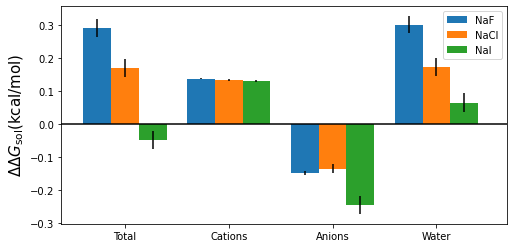

In [ ]:
solute = 'n-butane'
concentration = '0.5'

fig, ax = plt.subplots(1,1,figsize=(8,4))

tag = 1
for salt,S in salts.items():
    with open (f'/home/lin/Cavity-Formation/Simulations/solute_salt_water/{solute}/{salt}/{concentration}/free_energy.txt','r') as f:
        for line in f:
            pass
        last_line = line.split()
    saltfe = [float(x) for x in last_line]

    with open (f'/home/lin/Cavity-Formation/Simulations/solute_salt_water/{solute}/nosalt/free_energy.txt','r') as f:
        for line in f:
            pass
        last_line = line.split()
    nosaltfe = [float(x) for x in last_line]

    print ('saltfe is')
    print (saltfe)
    print ('nosaltfe is')
    print (nosaltfe)

    totfe = saltfe[1] - nosaltfe[1]
    totyerr = saltfe[2] + nosaltfe[2]
    watfe = saltfe[7] - nosaltfe[1]
    watyerr = saltfe[8] + nosaltfe[2]

    left = np.array(['Total', 'Cations', 'Anions', 'Water'])
    x = np.array([1, 2, 3, 4])
    height = 'height_' + str(tag) + '= np.array([totfe,saltfe[3],saltfe[5],watfe])'
    exec(height)
    yerr = 'yerr_' + str(tag) + '= np.array([totyerr,saltfe[4],saltfe[6],watyerr])'
    exec(yerr)

    margin = 0.2
    total_width = 1 - margin
    width = (1-margin)/len(salts)
    pos = x - total_width*( 1- (2*tag+1)/len(salts) )/2

    plot_script = 'ax.bar(pos,height_' + str(tag) + ',yerr=yerr_' + str(tag) + f',align="center",width={width},label=salt)'
    exec(plot_script)
    tag = tag + 1


labels = ['Total', 'Cations', 'Anions', 'Water']
plt.xticks(x+width, labels)
ax.legend()
ax.hlines(0,0.65,4.95, colors='black')
plt.xlim(0.65,4.95)
ax.set_ylabel('$\Delta\Delta G_{\mathrm{sol}}$(kcal/mol)',fontsize=15)

### $\Delta \mu_{\textrm{excl}}$

excl is
[11.4206307, -0.0093405, 0.0492735, 11.3806978]
excl is
[11.383355, -0.0101853, 0.1463822, 11.2471582]
excl is
[11.3947305, -0.0111852, 0.2051475, 11.2007682]


Text(0, 0.5, '$\\Delta\\mu_{\\mathrm{excl}}$(kcal/mol)')

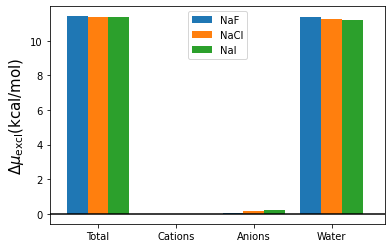

In [ ]:
solute = 'n-butane'
concentration = '0.5'

fig, ax = plt.subplots()

tag = 1
for salt,S in salts.items():
    with open (f'/home/lin/Cavity-Formation/Simulations/solute_salt_water/{solute}/{salt}/{concentration}/excl.out','r') as f:
        for line in f:
            pass
        last_line = line.split()
    excl = [float(x) for x in last_line]

    print ('excl is')
    print (excl)

    left = np.array(['Total', 'Cations', 'Anions', 'Water'])
    x = np.array([1, 2, 3, 4])
    height = 'height_' + str(tag) + '= np.array([excl[0],excl[1],excl[2],excl[3]])'
    exec(height)
    # yerr = 'yerr_' + str(tag) + '= np.array([totyerr,saltfe[4],saltfe[6],watyerr])'
    # exec(yerr)

    margin = 0.2
    total_width = 1 - margin
    width = (1-margin)/len(salts)
    pos = x - total_width*( 1- (2*tag+1)/len(salts) )/2

    plot_script = 'ax.bar(pos,height_' + str(tag) + f',align="center",width={width},label=salt)'
    exec(plot_script)
    tag = tag + 1


labels = ['Total', 'Cations', 'Anions', 'Water']
plt.xticks(x+width, labels)
ax.legend()
ax.hlines(0,0.65,4.95, colors='black')
plt.xlim(0.65,4.95)
ax.set_ylabel('$\Delta\mu_{\mathrm{excl}}$(kcal/mol)',fontsize=15)

# RESEARCH NOTES
_will be deleted when the study is finished_